In [1]:
import string

from collections import Counter

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
text = open('nlp-martin luther.txt', encoding="utf-8").read()

lower_case = text.lower()

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

tokenized_words = word_tokenize(cleaned_text, "english")


In [3]:
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [4]:
lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [5]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' sad', ' free', ' happy', ' happy', ' alone', ' sad', ' happy', ' singled out', ' sad'] 
 

Count of each emotion 
 Counter({' sad': 3, ' happy': 3, ' free': 1, ' alone': 1, ' singled out': 1})


In [6]:

sia = SentimentIntensityAnalyzer()

test_sent = 'Corona is bad virus and killed many people' 

print (sia.polarity_scores(test_sent))

{'neg': 0.571, 'neu': 0.429, 'pos': 0.0, 'compound': -0.8402}


In [11]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n                Negative Sentiment    ")
        
    elif score['neg'] < score['pos']:
        print("\n                Positive Sentiment    ")
    else:
        print("Neutral Sentiment")


                Positive Sentiment    


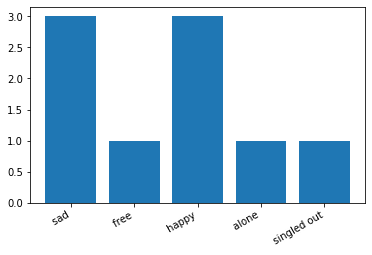

In [12]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

people seems to be have mixed reaction of equally being sad and happy